In [1]:
#import librarires

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8) #Adjust the configuration of the plots

#read the data from data file

df = pd.read_csv(r'C:\Users\milan\OneDrive\Desktop\Projects\New folder\movies.csv')



In [2]:
# look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#removing duplicate values from the data set

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# finding missing values in percentage% from the dataset

for col in df.columns:
    missing_prct = np.mean(df[col].isnull())
    print('{} - {:.2f}%'.format(col,missing_prct)) # used (":.1f") to limit value to 1 decimal

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [5]:
# printing data types of columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
budget_numeric = pd.to_numeric(df['budget'], errors='coerce')
mean_budget = np.floor(budget_numeric).mean()  # Calculate mean after converting to numeric and flooring
df['budget'] = np.floor(budget_numeric).fillna(mean_budget).astype('float64')

In [7]:
# changing data type of the columns

df['budget']=np.floor(pd.to_numeric(df['budget'], errors='coerce')).fillna(df['budget'].mean()).astype('float64')

print(df['budget'])

df['gross']=np.floor(pd.to_numeric(df['gross'], errors='coerce')).fillna(df['gross'].mean()).astype('float64')

print(df['gross'])

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664    35589876.0
7665       58750.0
7666       15000.0
7667    35589876.0
Name: budget, Length: 7668, dtype: float64
0       4.699877e+07
1       5.885311e+07
2       5.383751e+08
3       8.345354e+07
4       3.984634e+07
            ...     
7663    7.850054e+07
7664    7.850054e+07
7665    7.850054e+07
7666    7.850054e+07
7667    7.850054e+07
Name: gross, Length: 7668, dtype: float64


In [8]:
df = df.sort_values(by=['gross'], inplace= False, ascending = False)

df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


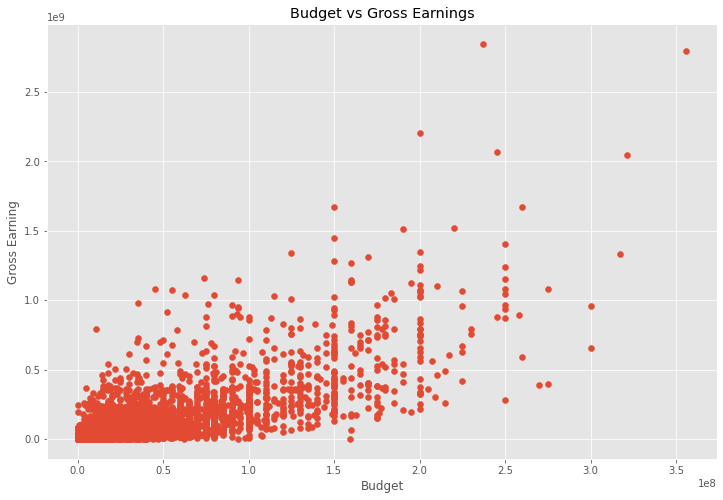

In [9]:
#scatter plot for budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel('Gross Earning')

plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

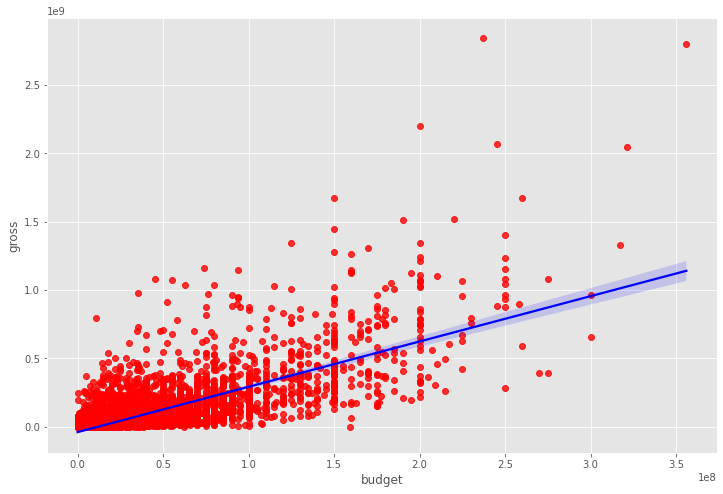

In [10]:
#plot budget vs gross using seaborn

sns.regplot(x ='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color": "blue"})

In [11]:
#looking at correlation, 1.pearson, 2.kendall, 3.spearman

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811
score,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305
gross,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000


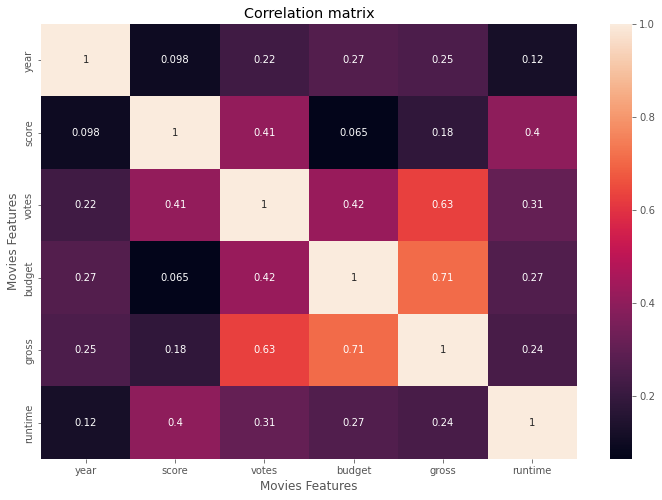

In [12]:
#visuallizing correlations

correlation_matrix= df.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [13]:
#Assigning numeric values to other columns

df_numerize = df
for col_name in df_numerize.columns:
    if(df_numerize[col_name].dtype == 'object'):
        df_numerize[col_name] = df_numerize[col_name].astype('category')
        df_numerize[col_name] = df_numerize[col_name].cat.codes

df_numerize

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,3360,6,4,2000,1119,6.5,5200.0,730,1123,2319,54,35589876.0,1.400000e+03,477,103.0
7625,6720,-1,4,2019,1149,5.7,320.0,2546,2565,1915,55,35589876.0,7.900000e+02,2308,104.0
7580,4664,3,5,2019,1835,5.2,735.0,1445,2203,2278,55,35589876.0,6.820000e+02,1992,93.0
2417,3406,-1,6,1993,85,7.3,5100.0,33,1718,2563,27,11900000.0,5.960000e+02,796,134.0


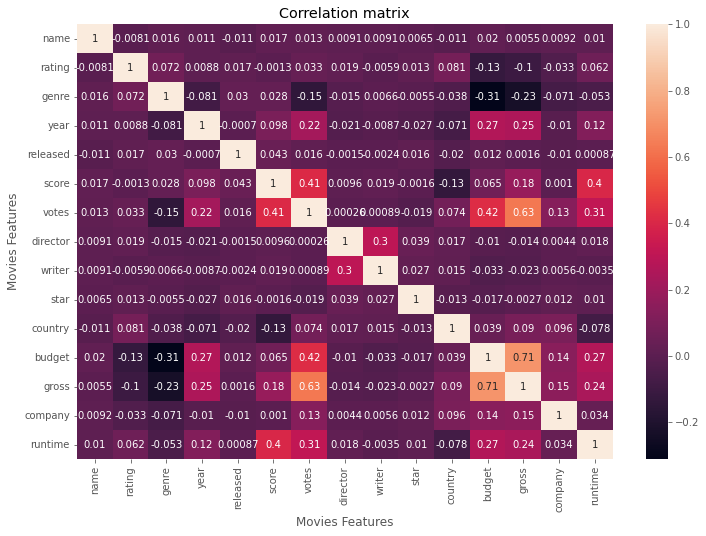

In [14]:
correlation_matrix= df_numerize.corr(method= 'pearson')

sns.heatmap(correlation_matrix, annot= True)
plt.title('Correlation matrix')
plt.xlabel('Movies Features')
plt.ylabel('Movies Features')
plt.show()

In [15]:
df_numerize.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174


In [16]:
correlation_matrix= df_numerize.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name     name        1.000000
         rating     -0.008069
         genre       0.016355
         year        0.011453
         released   -0.011311
                       ...   
runtime  country    -0.078412
         budget      0.265305
         gross       0.241336
         company     0.034402
         runtime     1.000000
Length: 225, dtype: float64

In [17]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.310566
genre    budget    -0.310566
gross    genre     -0.230267
genre    gross     -0.230267
votes    genre     -0.145307
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [18]:
high_corr= sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.628713
votes     gross       0.628713
budget    gross       0.711270
gross     budget      0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64